# Indices Script
## written for 4 bands Sequoia sensor
### by Florian Beyer
### 2019-02-04
---------------
### all indices were selected in the IDB
#### IDB = Index Database
#### https://www.indexdatabase.de/
---------------
#### MS = multispectral

In [4]:
## Packages

import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
## Input directory
MS = 'N:\\Projekt_Wetscapes\\Bearbeitung\\2019_01_31_Huetelmoor\\rs_data\\001_Resampling\\2018_11_01_H_MS_25cm_tif.tif'

## Output directory

suffix = '2018_11_01_H_MS_25cm_'
save_path = 'N:\\Projekt_Wetscapes\\Bearbeitung\\2019_01_31_Huetelmoor\\rs_data\\004_indizes_MS\\'

In [7]:
## read bands of MS dataset
with rasterio.open(MS) as src:
    g = src.read(1) # green
    g = g.astype('f4')
    r = src.read(2) # red
    r = r.astype('f4')
    re = src.read(3) # red edge
    re = re.astype('f4')
    nir = src.read(4) # near infrared
    nir = nir.astype('f4')

Text(0,0.5,u'Row #')

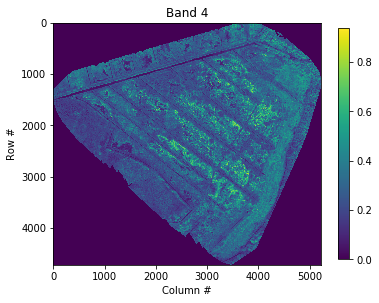

In [8]:
## plot the NIR band

plt.figure(figsize=(6,8.5))
plt.imshow(nir)
plt.colorbar(shrink=0.5)
plt.title('Band 4')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [9]:
# Calculate indices
ndvi = (nir - r) / (nir + r)


atsavi = 1.22 * ((nir-1.22*r-0.03) / (1.22*nir+re-1.22*0.03+0.08*(1+1.22**2)))
ari = (1/g) - (1/r)
avi = 2.0*nir-r
arvi2 = -0.18+1.17*( (nir-r) / (nir+r) )
bri = ((1.0/g) - (1.0/re)) / (nir)
# CARI ist nicht klar definiert
#temp_a = (re-g)/150.0
#temp_b = (g - (((re-g)/150.0 )*550.0))
#cari =  (re/r) * ( (np.sqrt( ( a * 670.0 + r + b )**2 ) ) / (np.sqrt(a**2 + 1)) )
#cari2 = (re/r) * ( np.absolute((a*r+r)) / (np.sqrt(a**2 + 1)) ) 
ccci = ( (nir-re)/(nir+re) ) / ( (nir-r)/(nir+r) )
chlgreen = (nir/g)**(-1)
chlrededge = (nir/re)**(-1)
cigreen = (nir/g)-1.0
cirededge = (nir/re)-1.0
ctvi = ((ndvi+0.5)/(np.absolute(ndvi+0.5)))+np.sqrt(np.absolute(ndvi+0.5))
cvi = nir*(r/g**2)
datt1 = (nir-re)/(nir-r)
datt4 = r/(g*re)
ddn = 2*(re-nir-nir)
diff1 = nir-g
diff2 = nir-r
dvimss = 2.4*nir-r
evi2 = 2.4*( (nir-r) / (nir+r+1.0) )
evi22 = 2.5*( (nir-r) / (nir+2.4*r+1.0) )
fe3 = r/g

n_temp = ( 2*(nir**2 - r**2) + 1.5*nir+0.5*r ) / (nir+r+0.5)
gemi = (n_temp*(1-0.25*n_temp) - ( (r-0.125) / (1-r) ))
gndvi = (nir-g) / (nir+g)
gosavi = ((nir-g)/(nir+g+0.5))*(1+0.5)
grndvi = (nir-(g+r)) / (nir+(g+r))
lai = 3.618*evi22-0.118 #https://www.harrisgeospatial.com/docs/BroadbandGreenness.html
lci = (nir-re)/(nir-r)
logr = np.log(nir/r)
maccioni = (nir-re)/(nir-r)
mari = (g**(-1) - re**(-1))*nir
mcari = ((re-r) - 0.2*(re-g))*(re/r)
mcari1 = 1.2* (2.5*(nir-r) - 1.3*(nir-g))
mcari2 = 1.5 * ( ( 1.2*(nir-g) - 2.5*(r-g) )/( np.sqrt( (2*nir+1)**2 - (6*nir-5*np.sqrt(r)) -0.5)))
msavi = (2*nir+1-np.sqrt( (2*nir+1)**2 - 8*(nir-r))) / 2
msr670 = ((nir/r)-1) / (np.sqrt(((nir/r)-1)))
mtvi2 = 1.5 * ( ( 2.5*(nir-g) - 1.3*(r-g) )/( np.sqrt( (2*nir+1)**2 - (6*nir-5*np.sqrt(r)) -0.5)))

mgvi = -0.386*g-0.530*r+0.535*re+0.532*nir
mnsi = 0.404*g-0.039*r-0.505*re+0.762*nir
msbi = 0.406*g+0.600*r+0.645*re+0.243*nir
myvi = 0.723*g-0.597*r+0.206*re-0.278*nir

ndre = (nir-re) / (nir+re)
ndrdi = (g-re) / (g+re)
nli = (nir**2 - r) / (nir**2 + r)
normg = g/(nir+r+g)
normnir = nir/(nir+r+g)
normr = r/(nir+r+g)

osavi1 = (1 + 0.16) * (nir - r)/(nir + r + 0.16)
osavi2 = (1 + 0.16) * (nir - re)/(nir + re + 0.16)
pvr = (g-r) / (g+r)
rdvi = (nir-r) / (nir+r)**0.5
rededge2 = rdvi = (nir-re) / (nir+re)
# L = 0.5 muss nachrecherchiert werden (huete 1989)
savi = ((nir-r) / (nir+r+0.5))*(1+0.5)
sbl = nir- 2.4*r
spvi = 0.4*( 3.7*(nir-r) - 1.2*np.absolute(g-r) )

tcari = 3*( (re-r) -0.2*(re-g) *(re/r))
tcari2 = 3*( (nir-re) -0.2*(nir-g) *(nir/re))
tcari_osavi = tcari/osavi1
tci = 1.2*(re-g) -1.5*(r-g)+np.sqrt(re/r)
tvi = np.sqrt(((nir-r) / (nir+r))+0.5)

tc_gvimss = -0.283*g-0.660*r+0.577*re+0.388*nir
tc_nsimss = -0.016*g+0.131*r-0.425*re+0.882*nir
tc_sbimss =  0.332*g+0.603*r+0.675*re+0.262*nir
tc_yvimss = -0.899*g+0.428*r+0.076*re-0.041*nir

varirededge = (re-r) / (re+r)

wdrvi = (0.1*nir-r)/(0.1*nir+r)


mcari_mtvi2 = mcari/mtvi2

mcari_osavi = mcari/osavi2


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in divide
  app.launch_new

In [10]:
indices = [ndvi,atsavi,ari,avi,arvi2,bri,ccci,chlgreen,chlrededge,cigreen,cirededge,ctvi,cvi,datt1,datt4,ddn,
           diff1,diff2,dvimss,evi2,evi22,fe3,gemi,gndvi,gosavi,grndvi,lai,lci,logr,maccioni,mari,mcari,mcari1,mcari2,
           msavi,msr670,mtvi2,mgvi,mnsi,msbi,myvi,ndre,ndrdi,nli,normg,normnir,normr,osavi1,osavi2,pvr,rdvi,rededge2,
           savi,sbl,spvi,tcari,tcari2,tcari_osavi,tci,tvi,tc_gvimss,tc_nsimss,tc_sbimss,tc_yvimss,varirededge,wdrvi,
           mcari_mtvi2,mcari_osavi]
indices_names = ['ndvi','atsavi','ari','avi','arvi2','bri','ccci','chlgreen','chlrededge','cigreen','cirededge',
                 'ctvi','cvi','datt1','datt4','ddn','diff1','diff2','dvimss','evi2','evi22','fe3','gemi','gndvi',
                 'gosavi','grndvi','lai','lci','logr','maccioni','mari','mcari','mcari1','mcari2','msavi','msr670','mtvi2',
                 'mgvi','mnsi','msbi','myvi','ndre','ndrdi','nli','normg','normnir','normr','osavi1','osavi2','pvr',
                 'rdvi','rededge2','savi','sbl','spvi','tcari','tcari2','tcari_osavi','tci','tvi','tc_gvimss','tc_nsimss',
                 'tc_sbimss','tc_yvimss','varirededge','wdrvi','mcari_mtvi2','mcari_osavi']

In [11]:
# generate mask image from red band
mask = np.copy(r)
mask[mask > 0.0] = 1.0 # all actual pixels have a value of 1.0
mask[mask == 0.0] = 'nan' # border values have no value 'nan'

In [12]:
indices_masked = []
for i in indices:
    temp = i*mask
    indices_masked.append(temp)
    temp = 'none'

Text(0,0.5,u'Row #')

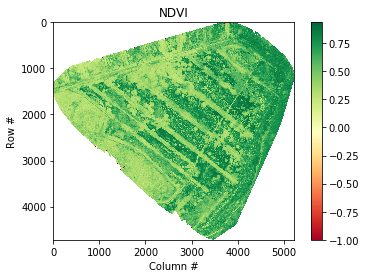

In [13]:
# plot ndvi as an example
plt.imshow(indices_masked[0], cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [14]:
# copy and update metadata from 4 bands to 1 band
with rasterio.open(MS) as src:
    print 'Meta data of the image dataset: {} \n\n'.format(src.profile)
    profile = src.profile.copy()
    
    profile.update({
        # all meta data are the same except the bands number
        'count': 1, # this is the important update from 4 bands to one band
        'crs': rasterio.crs.CRS({'init': u'epsg:32633'}),
        'interleave': 'pixel', 'dtype': 'float32',
        'driver': u'GTiff',
        'transform': rasterio.transform.Affine(0.25, 0.0, 315423.629, 0.0, -0.25, 6011303.437),
        'height': 4721,
        'width': 5224,
        'tiled': False,
        'nodata': None})
    print 'Meta data of the index dataset: {}'.format(profile)

Meta data of the image dataset: {'count': 4, 'crs': CRS({'init': u'epsg:32633'}), 'interleave': 'pixel', 'dtype': 'float32', 'driver': u'GTiff', 'transform': Affine(0.25, 0.0, 315423.629,
       0.0, -0.25, 6011303.437), 'height': 4721, 'width': 5224, 'tiled': False, 'nodata': None} 


Meta data of the index dataset: {'count': 1, 'crs': CRS({'init': u'epsg:32633'}), 'width': 5224, 'dtype': 'float32', 'driver': u'GTiff', 'transform': Affine(0.25, 0.0, 315423.629,
       0.0, -0.25, 6011303.437), 'height': 4721, 'interleave': 'pixel', 'tiled': False, 'nodata': None}


In [15]:
# save all indices

for i in range(len(indices_masked)):
    filename = save_path+suffix+indices_names[i]+'.tif'
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write_band(1,indices_masked[i])
    


C:\Anaconda2\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


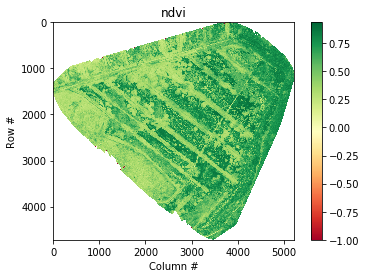

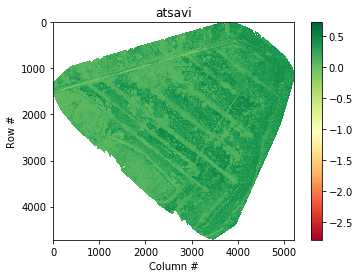

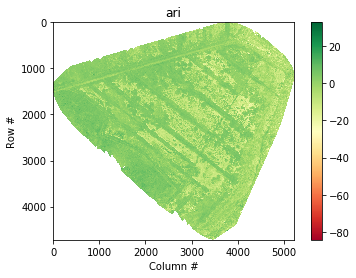

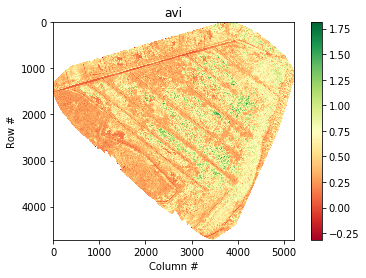

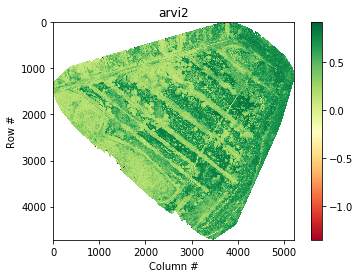

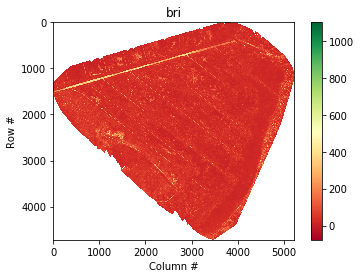

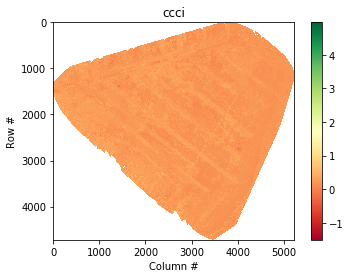

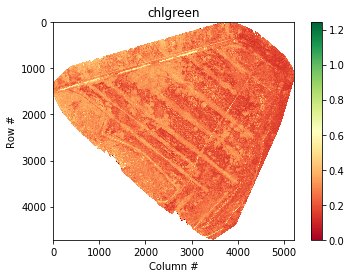

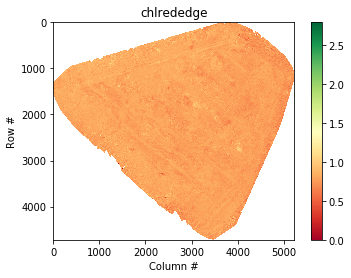

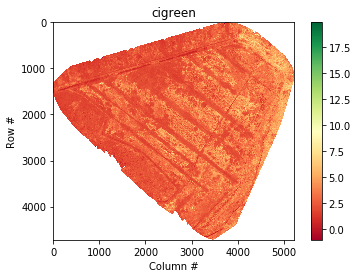

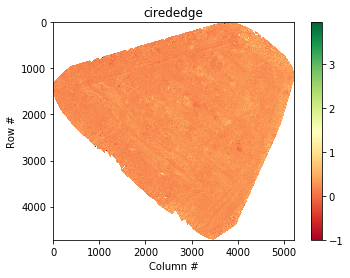

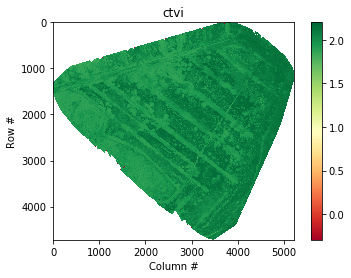

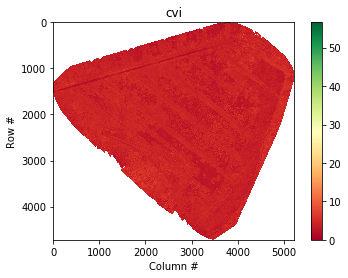

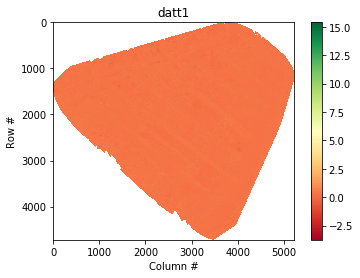

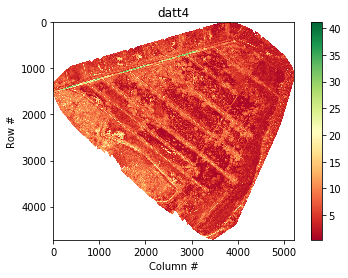

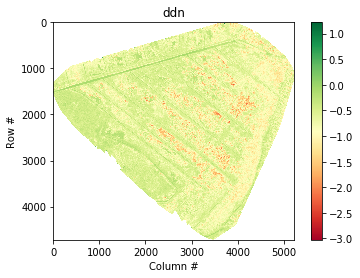

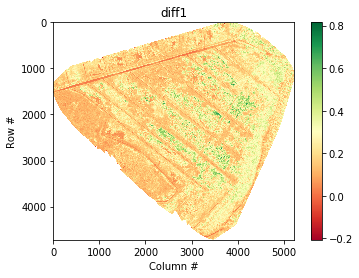

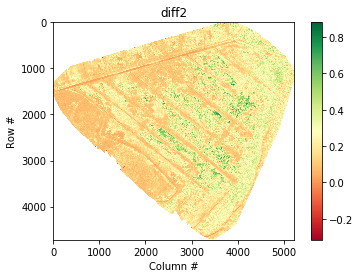

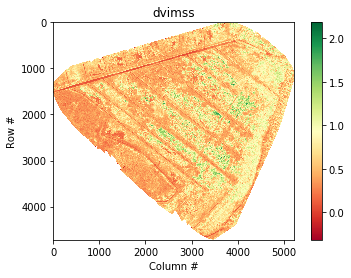

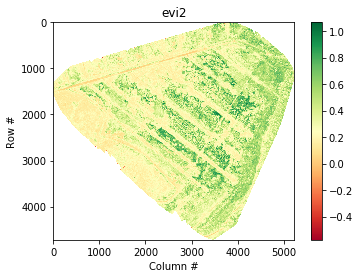

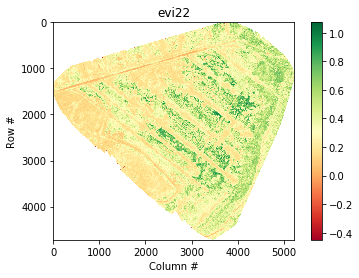

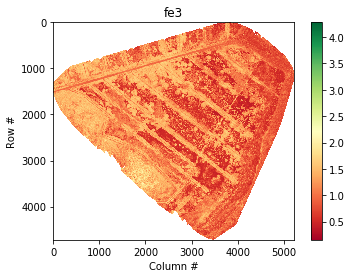

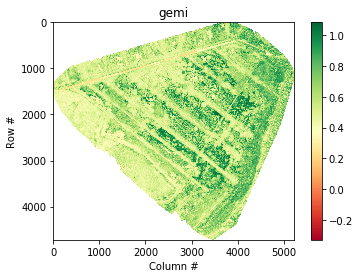

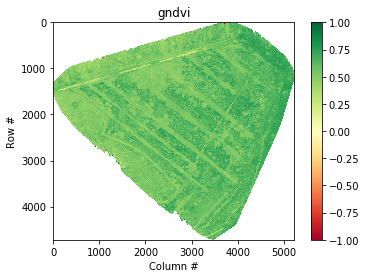

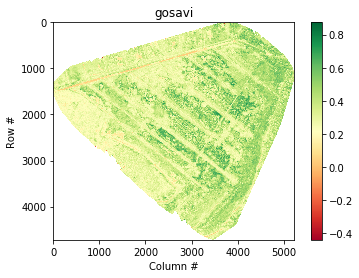

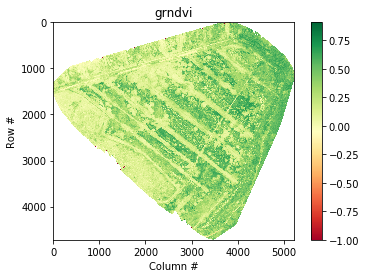

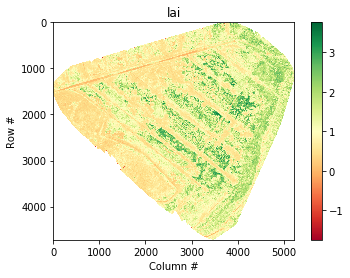

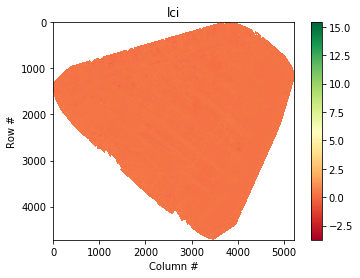

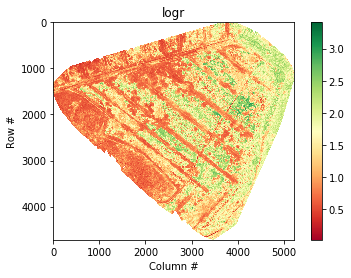

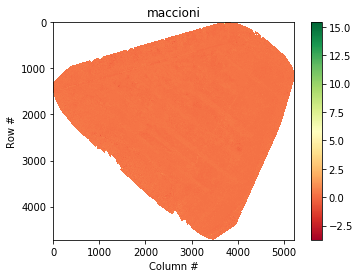

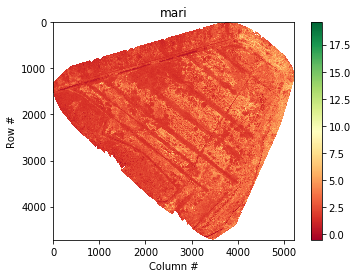

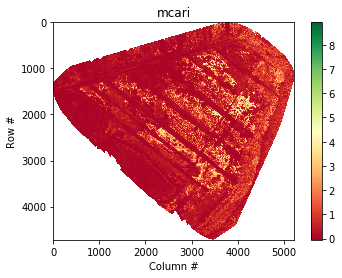

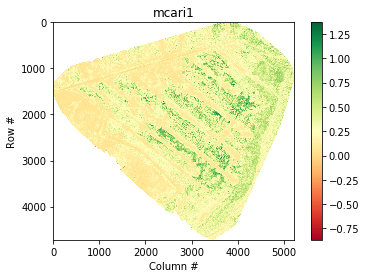

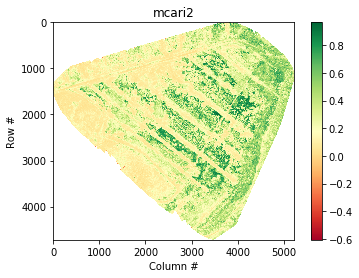

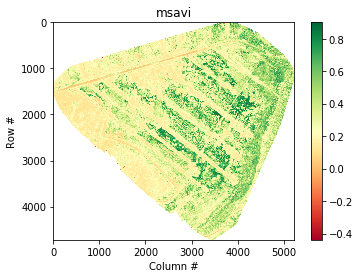

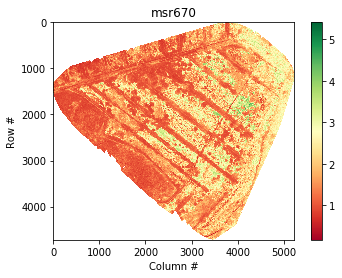

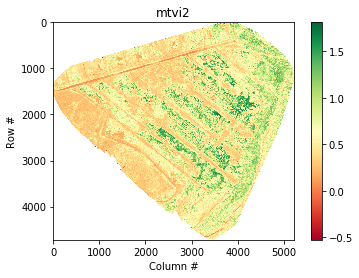

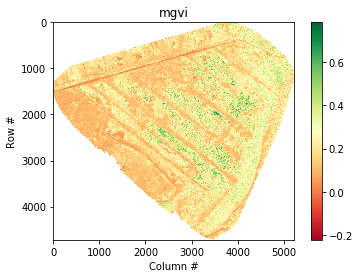

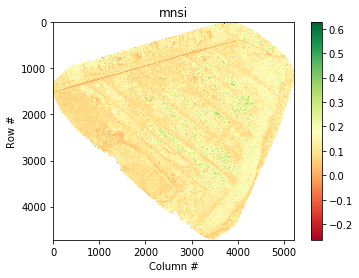

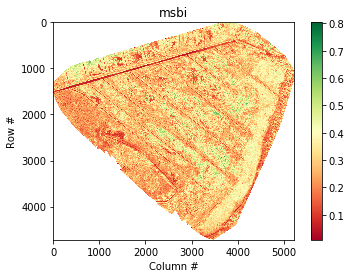

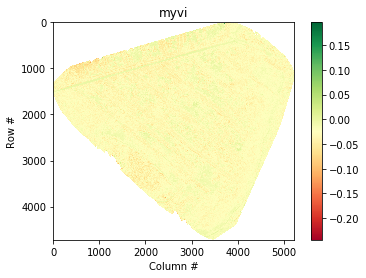

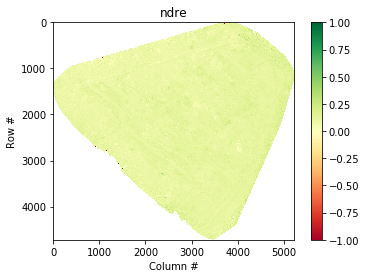

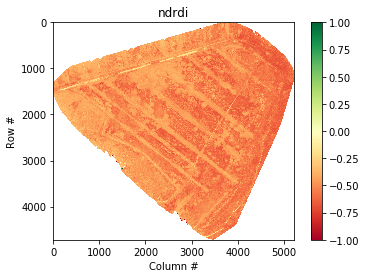

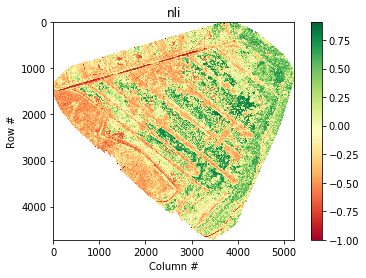

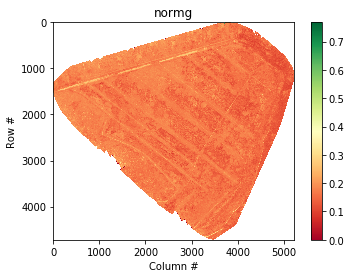

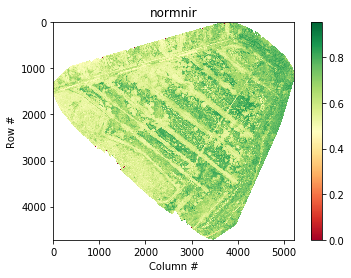

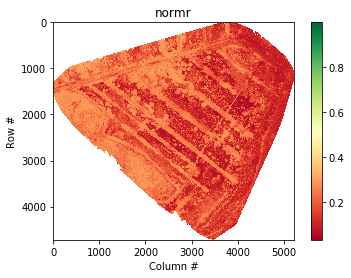

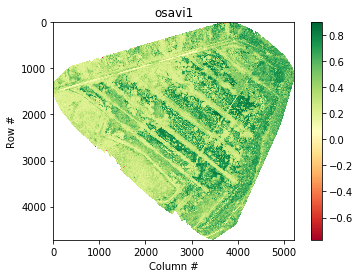

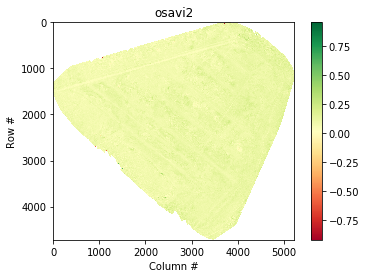

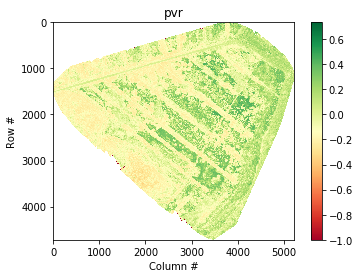

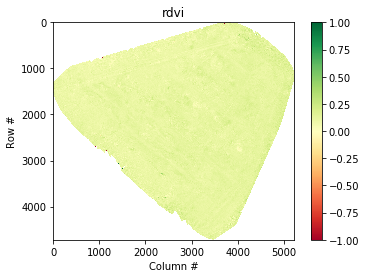

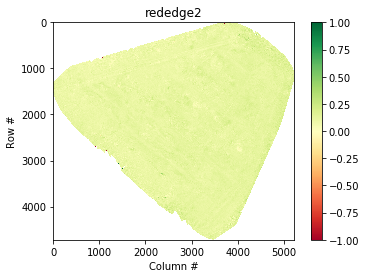

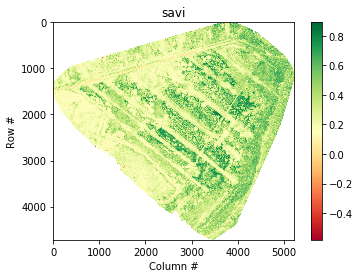

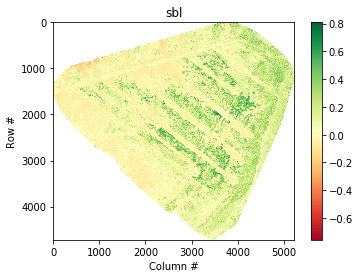

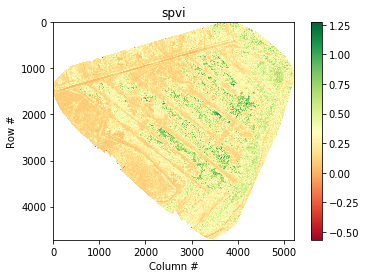

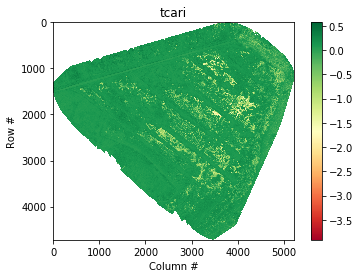

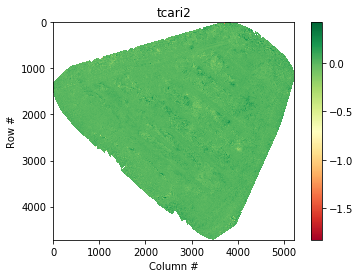

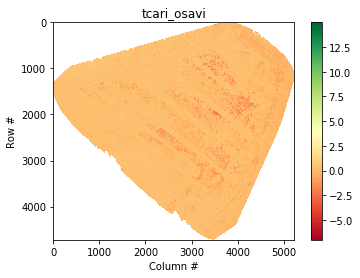

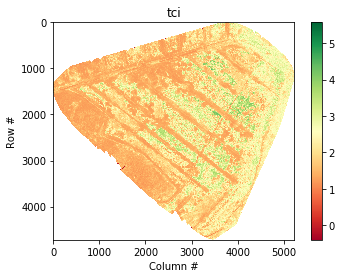

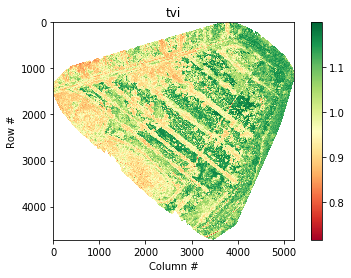

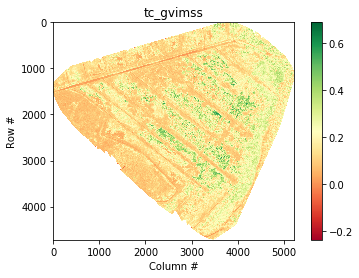

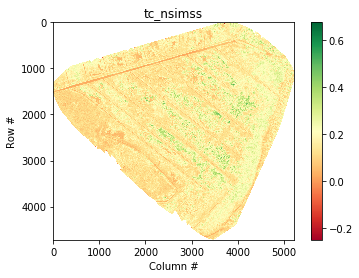

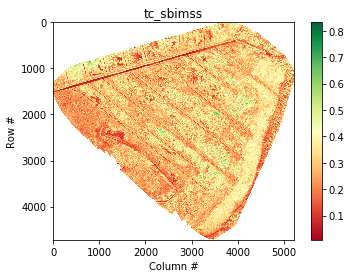

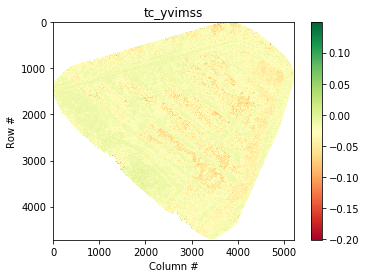

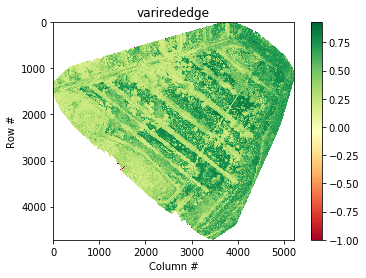

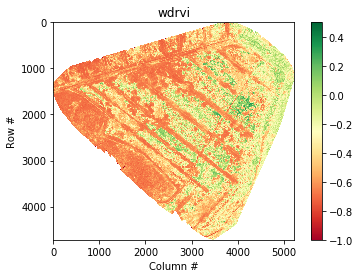

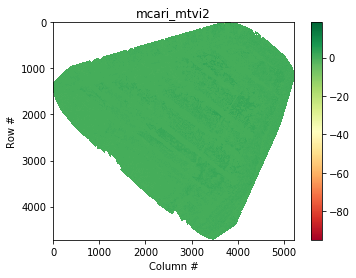

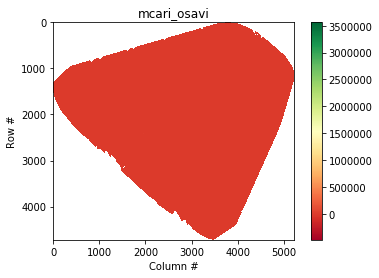

In [16]:
# plot all indices
for i in range(len(indices_masked)):
    plt.figure()
    plt.imshow(indices_masked[i], cmap='RdYlGn')
    plt.colorbar()
    plt.title(indices_names[i])
    plt.xlabel('Column #')
    plt.ylabel('Row #')